In [1]:
from datetime import datetime
import math
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

df = pd.read_json('tracktranslegislation.json')

regions = {
    'New England': ['CT', 'ME', 'MA', 'NH', 'RI', 'VT'],
    'Mid-Atlantic': ['DE', 'MD', 'NJ', 'NY', 'PA'],
    'South': ['AL', 'AR', 'FL', 'GA', 'KY', 'LA', 'MS', 'MO', 'NC', 'SC', 'TN', 'VA', 'WV'],
    'Midwest': ['IL', 'IN', 'IA', 'KS', 'MI', 'MN', 'NE', 'ND', 'OH', 'SD', 'WI'],
    'Southwest': ['AZ', 'NM', 'OK', 'TX'],
    'West': ['AK', 'CA', 'CO', 'HI', 'ID', 'MT', 'NV', 'OR', 'UT', 'WA', 'WY'],
}

state_regions = {
    state: region
    for region, states in regions.items()
    for state in states
}
df

,id,billId,legiscanId,title,description,state,stateId,status,category,billLink,statusDate
0,0,HB27,1646385,Designate Sex For School-sponsored Sports,"An Act relating to school athletics, recreatio...",AK,2,1,Youth Athletics,https://legiscan.com/AK/bill/HB27/2023,2023/01/19
1,1,HB1156,1662211,Concerning A Public School District Or Open-en...,Concerning A Public School District Or Open-en...,AR,4,2,Public Facilities,https://legiscan.com/AR/bill/HB1156/2023,2023/02/01
2,2,HB1468,1715730,To Create The Given Name Act; And To Prohibit ...,To Create The Given Name Act; And To Prohibit ...,AR,4,1,Schools / Education,https://legiscan.com/AR/bill/HB1468/2023,2023/02/20
3,3,SB125,1680399,To Amend The Restrictions An Institution Of Hi...,To Amend The Restrictions An Institution Of Hi...,AR,4,1,Schools / Education,https://legiscan.com/AR/bill/SB125/2023,2023/01/25
4,4,SB199,1696352,Concerning Medical Malpractice And Gender Tran...,Concerning Medical Malpractice And Gender Tran...,AR,4,3,Healthcare,https://legiscan.com/AR/bill/SB199/2023,2023/03/08
...,...,...,...,...,...,...,...,...,...,...,...
367,367,SB697,1714924,"Prohibiting gender transition surgeries, treat...",The purpose of this bill is to prohibit gender...,WV,48,1,Healthcare,https://legiscan.com/WV/bill/SB697/2023,2023/02/20
368,368,HB0187,1665849,Student eligibility in interscholastic activit...,AN ACT relating to school sports; prohibiting ...,WY,50,6,Youth Athletics,https://legiscan.com/WY/bill/HB0187/2023,2023/01/31
369,369,SF0133,1664608,Student eligibility in interscholastic sports.,AN ACT relating to education; prohibiting stud...,WY,50,3,Youth Athletics,https://legiscan.com/WY/bill/SF0133/2023,2023/03/01
370,370,SF0144,1672878,Chloe's law-children gender change prohibition.,AN ACT relating to public health and safety; p...,WY,50,6,Healthcare,https://legiscan.com/WY/bill/SF0144/2023,2023/02/27


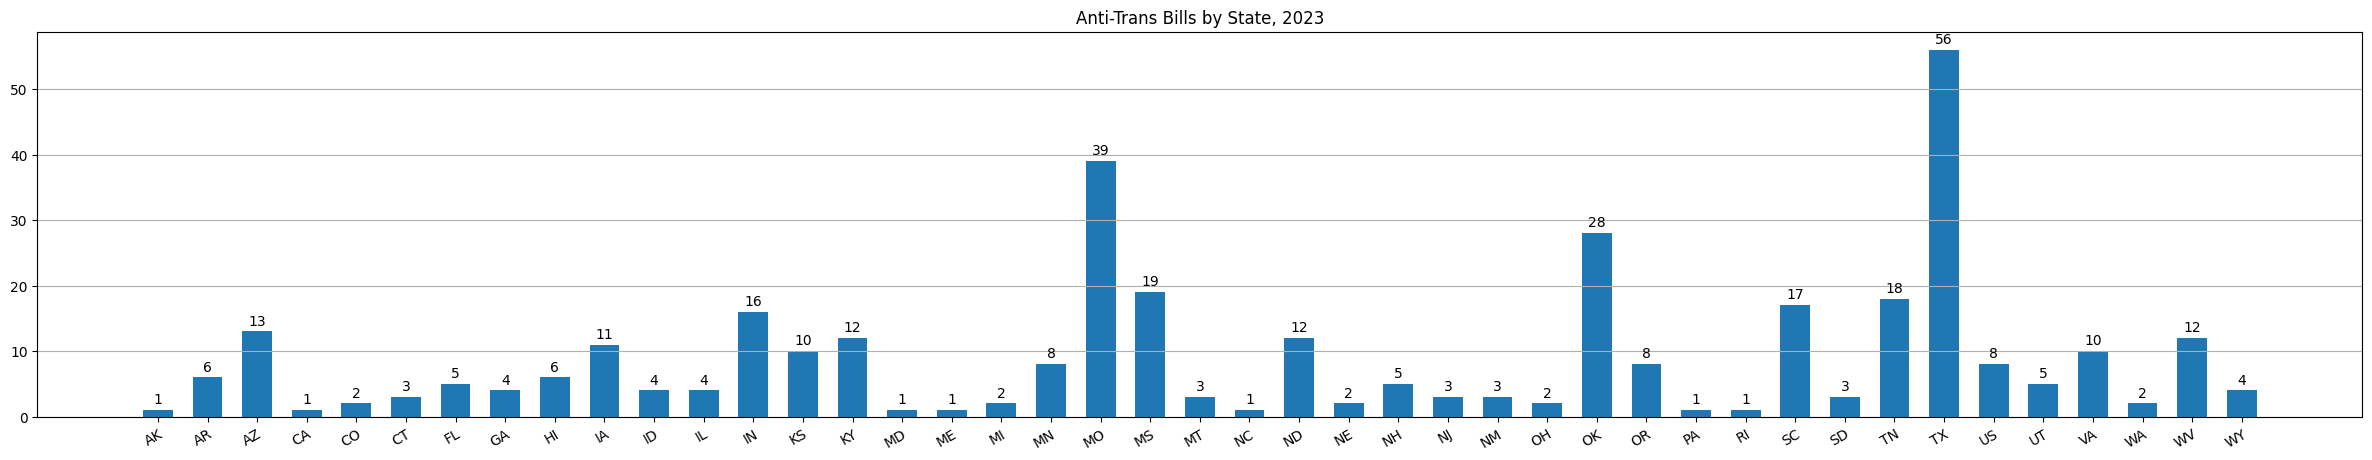

In [15]:
data = df['state'].value_counts().sort_index()

y_pos = np.arange(len(data))
plt.figure(figsize=(30,5))
plt.xticks(y_pos, data.index, rotation=30, ha="right", rotation_mode="anchor")
plt.grid(True, which='major', axis='y')
plt.bar(y_pos, data, align='center', width=0.6)
for i in range(len(data)):
    plt.text(i,data.iloc[i] + 1,data.iloc[i], ha='center')
plt.title('Anti-Trans Bills by State, 2023')
plt.show()

In [3]:
# oh shit there are feds involved too

df.loc[df.state == 'US']

,id,billId,legiscanId,title,description,state,stateId,status,category,billLink,statusDate
331,331,HB1064,1714858,Ensuring Military Readiness Act of 2023,To provide requirements related to the eligibi...,US,52,1,Other,https://legiscan.com/US/bill/HB1064/2023,2023/02/17
332,332,HB216,1650772,"My Child, My Choice Act of 2023",To prohibit Federal education funds from being...,US,52,1,Schools / Education,https://legiscan.com/US/bill/HB216/2023,2023/01/09
333,333,HB429,1674808,No Tax Breaks for Radical Corporate Activism Act,To amend the Internal Revenue Code of 1986 to ...,US,52,1,Healthcare,https://legiscan.com/US/bill/HB429/2023,2023/01/20
334,334,HR115,1702925,Establishing a Women's Bill of Rights to reaff...,Establishing a Women's Bill of Rights to reaff...,US,52,1,Other,https://legiscan.com/US/bill/HR115/2023,2023/02/09
335,335,SB187,1689600,No Tax Breaks for Radical Corporate Activism A...,A bill to amend the Internal Revenue Code of 1...,US,52,1,Healthcare,https://legiscan.com/US/bill/SB187/2023,2023/01/31
336,336,SB435,1710431,Ensuring Military Readiness Act of 2023,A bill to provide requirements related to the ...,US,52,1,Other,https://legiscan.com/US/bill/SB435/2023,2023/02/15
337,337,SB457,1710145,Protecting Our Kids from Child Abuse Act,A bill to establish a Federal tort against ped...,US,52,1,Healthcare,https://legiscan.com/US/bill/SB457/2023,2023/02/15
338,338,SR53,1703088,A resolution establishing a Women's Bill of Ri...,A resolution establishing a Women's Bill of Ri...,US,52,1,Other,https://legiscan.com/US/bill/SR53/2023,2023/02/09


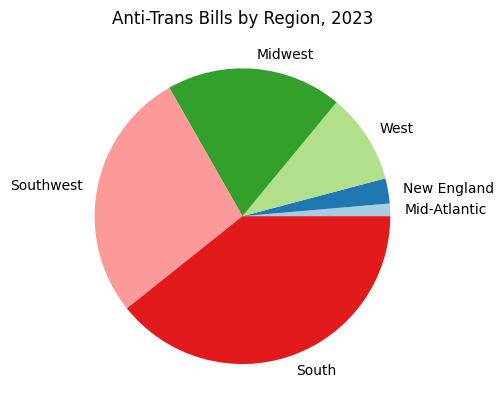

In [4]:
data = df.copy().loc[df.state != 'US']['state'].transform(lambda x: state_regions[x]).value_counts().sort_values()

colors = sns.color_palette('Paired')
plt.pie(data, labels=data.index, colors=colors)
plt.title('Anti-Trans Bills by Region, 2023')
plt.show()

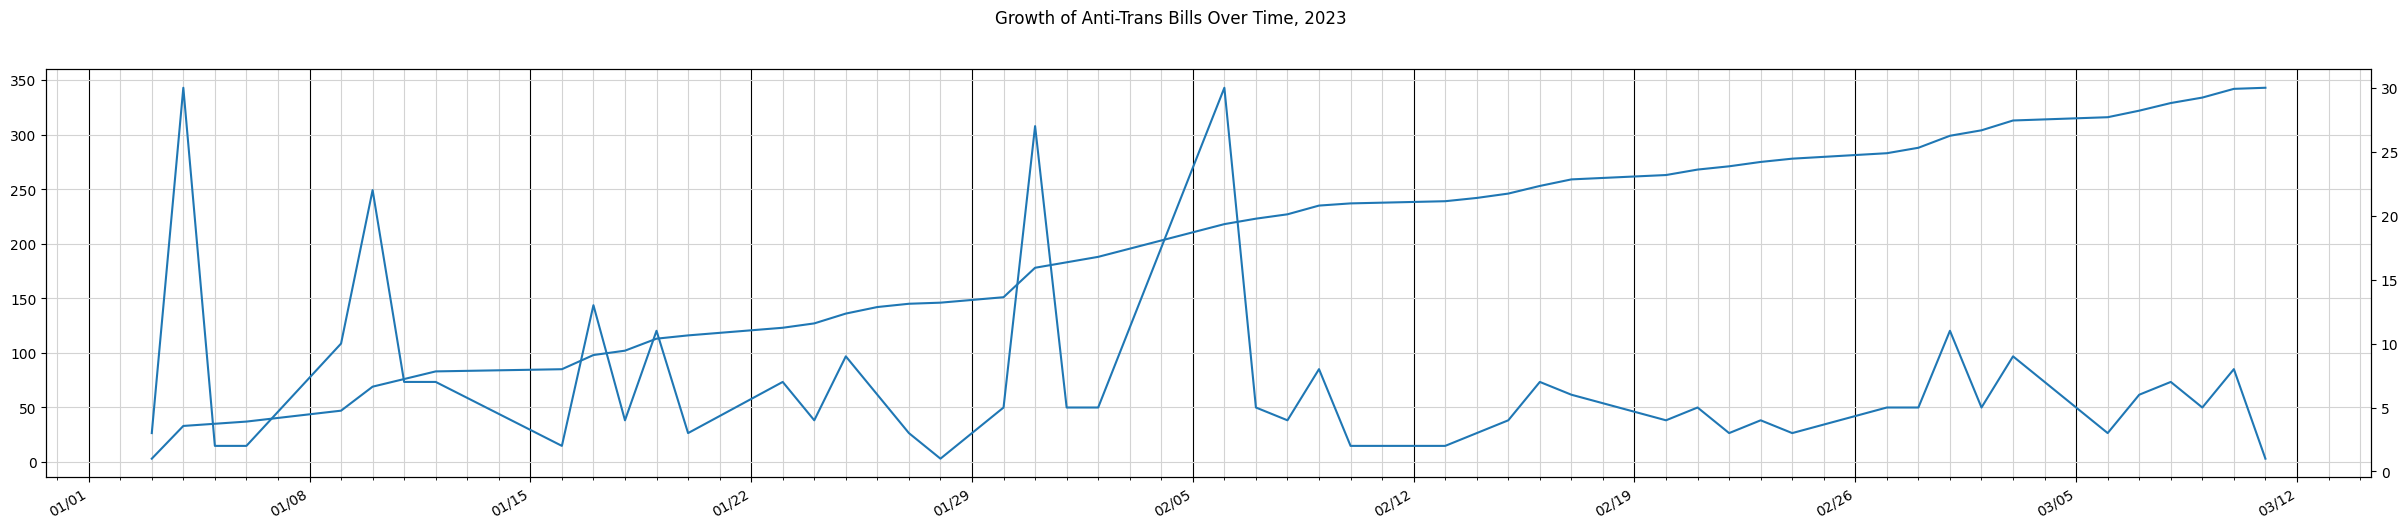

In [5]:
data = (
    df
        .loc[df.statusDate != '']
        .loc[df.statusDate >= '2023/01/01']
        .copy()
        ['statusDate'].transform(lambda x: datetime.strptime(x, '%Y/%m/%d').date())
        .value_counts()
        .sort_index()
)

data2 = data.cumsum()

fig, ax = plt.subplots(1, 1, figsize=(30, 6))
fig.suptitle('Growth of Anti-Trans Bills Over Time, 2023')

week_locator = mdates.WeekdayLocator(byweekday=6,interval=1)
day_locator = mdates.DayLocator(interval=1)
week_formatter = mdates.DateFormatter("%m/%d")
day_formatter = mdates.DateFormatter("%a")
ax.xaxis.set_major_locator(week_locator)
ax.xaxis.set_minor_locator(day_locator)
ax.xaxis.set_major_formatter(week_formatter)
ax.grid(True, which='major', axis='x', color='black')
ax.grid(True, which='minor', axis='x', color='lightgray')
ax.grid(True, which='major', axis='y', color='lightgray')
ax2=ax.twinx()
ax2.plot(data)
ax.plot(data2)
fig.autofmt_xdate(rotation=30)

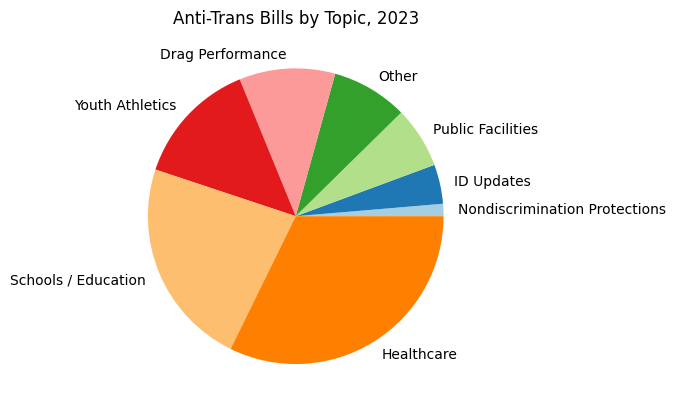

In [6]:
data = df['category'].value_counts().sort_values()

colors = sns.color_palette('Paired')
plt.pie(data, labels=data.index, colors=colors)
plt.title('Anti-Trans Bills by Topic, 2023')
plt.show()

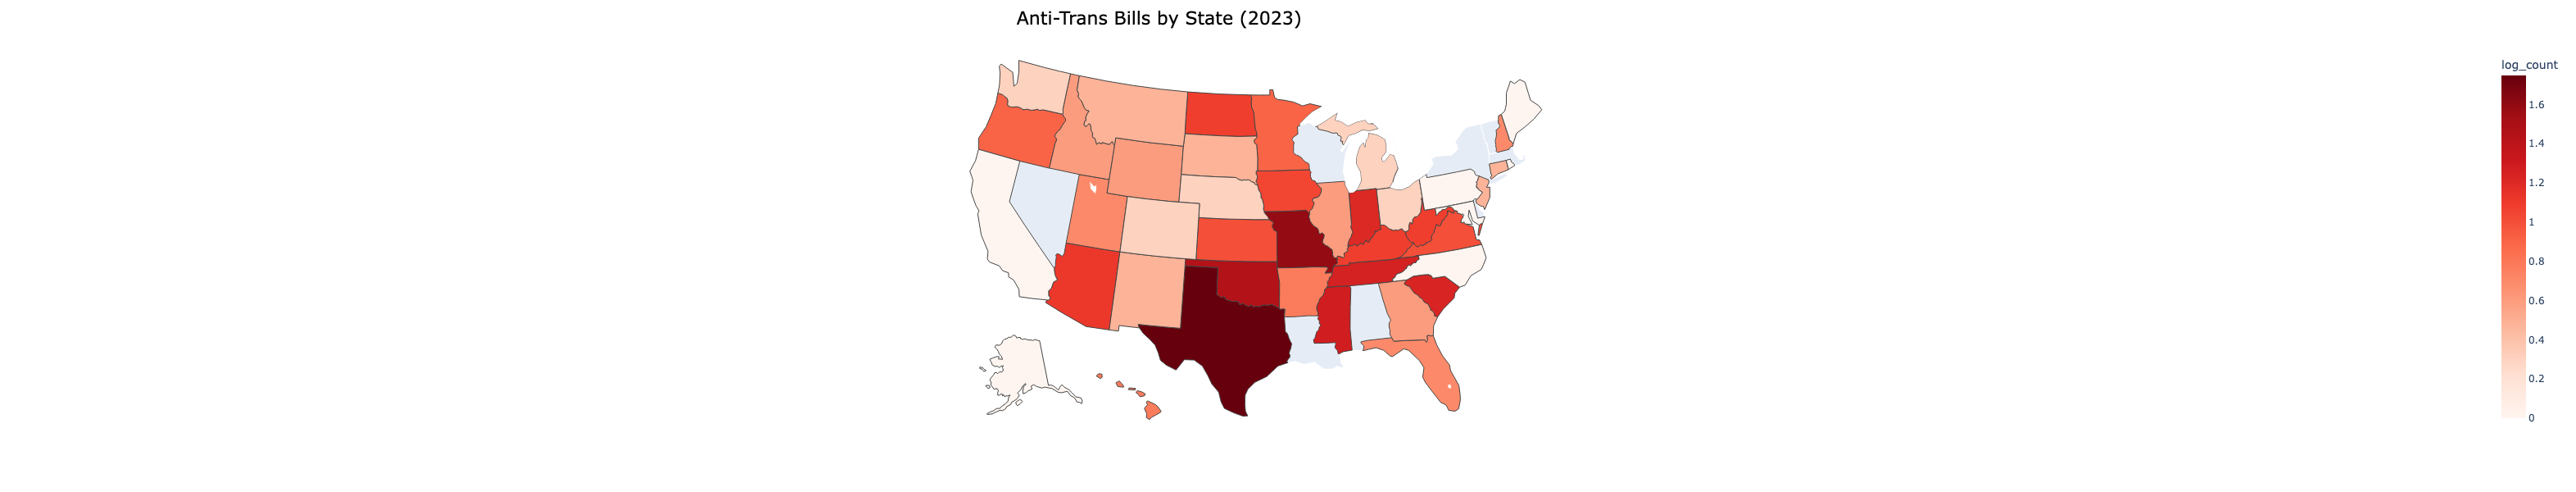

In [10]:
data = (
    df
        .copy()
        ['state']
        .value_counts()
        .to_frame()
        .rename(columns={'state':'log_count'})
        .rename_axis('state')
        .reset_index()
)

data['log_count'] = data['log_count'].transform(lambda x: math.log10(x))

fig = px.choropleth(
    data,
    locations='state',
    locationmode='USA-states',
    scope='usa',
    color='log_count',
    color_continuous_scale='reds',
)

fig.update_layout(
    height=600,
    width=1000,
    title_text = 'Anti-Trans Bills by State (2023)',
    title_font_size = 22,
    title_font_color="black", 
    title_x=0.45, 
)

fig.show()
